### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Data

In [2]:
df = pd.DataFrame(pd.read_csv('C:/Users/Admin/Python2/StateNames.csv'))

### Functions

In [3]:
def popular_name(data = df):
    df = data.groupby(['State', 'Name'], as_index = False).aggregate({'Count' : 'sum'})
    return df.loc[df.groupby('State')['Count'].idxmax()][['State', 'Name', 'Count']]

def popular_name_b_year(data = df, year = 1990):
    df_before = data.loc[data['Year'] <= year]
    df_before = popular_name(df_before).reset_index(drop = True)
    return df_before

def popular_name_a_year(data = df, year = 1990):
    df_after = data.loc[data['Year'] >= year]
    df_after = popular_name(df_after).reset_index(drop = True)
    return df_after

def top_n(data = df, n = 3):
    df = data.groupby(['State', 'Name', 'Gender'], as_index = False)
    df = df.aggregate({'Count' : 'sum'})
    df = df.sort_values('Count', ascending = False)
    return df[0:n]

def topn_names_bystate_byyear(data = df, State_1 = 'CO', State_2 = 'CA', State_3 = 'UT', start_y = 1990, end_y = 2000, n = 3):
    df = data.loc[data.Year >= start_y].loc[data.Year <= end_y]
    
    df_1 = df.loc[df.State == State_1]
    df_1_F = df_1.loc[df_1.Gender == 'F']
    df_1_F = top_n(data = df_1_F, n = n)
    df_1_M = df_1.loc[df_1.Gender == 'M']
    df_1_M = top_n(data = df_1_M, n = n)

    df_2 = df.loc[df.State == State_2]
    df_2_F = df_2.loc[df_2.Gender == 'F']
    df_2_F = top_n(data = df_2_F, n = n)
    df_2_M = df_2.loc[df_2.Gender == 'M']
    df_2_M = top_n(data = df_2_M, n = n)

    df_3 = df.loc[df.State == State_3]
    df_3_F = df_3.loc[df_3.Gender == 'F']
    df_3_F = top_n(data = df_3_F, n = n)
    df_3_M = df_3.loc[df_3.Gender == 'M']
    df_3_M = top_n(data = df_3_M, n = n)
    return pd.concat([df_1_F, df_1_M, df_2_F, df_2_M, df_3_F, df_3_M]).reset_index(drop = True)

def plot_dinamics(name, year = 1990):
    p = df[df.Name == name][['Year','Count']]
    p = p[p.Year >= year]
    return p.groupby(['Year']).aggregate({'Count' : 'sum'}).plot()

### Results and visualization

#### 1. Which name was the most popular in each state before and after 1990 year

In [4]:
before_1990 = popular_name_b_year()
before_1990

,State,Name,Count
0,AK,Michael,6355
1,AL,James,146670
2,AR,James,80151
3,AZ,Michael,31490
4,CA,Michael,338592
5,CO,Robert,43518
6,CT,John,72793
7,DC,John,31943
8,DE,John,13446
9,FL,James,115859


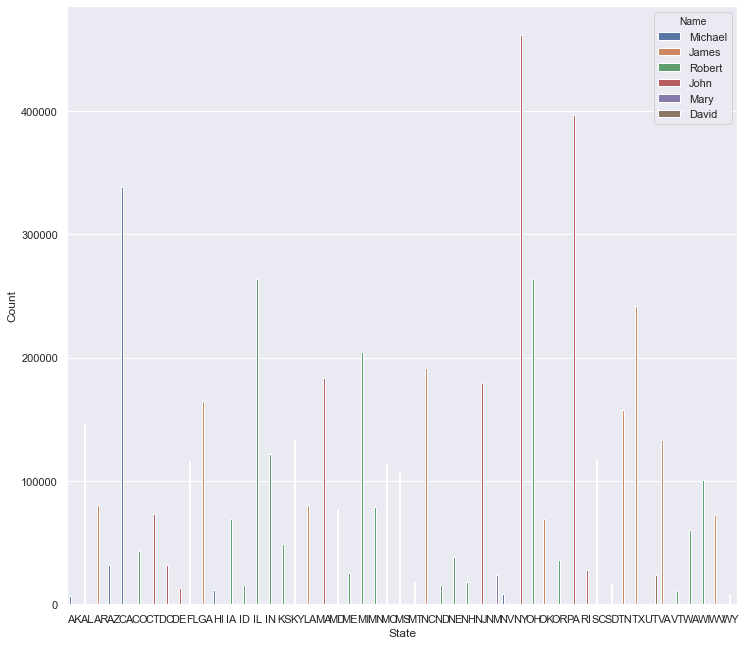

In [5]:
sns.set(rc={'figure.figsize':(12,11)})
before = sns.barplot(x="State",
                y="Count",
                hue = 'Name',
                data = before_1990)
before

In [6]:
after_1990 = popular_name_a_year()
after_1990

,State,Name,Count
0,AK,Michael,1916
1,AL,William,14629
2,AR,Jacob,6513
3,AZ,Michael,14456
4,CA,Daniel,103620
5,CO,Michael,10313
6,CT,Michael,12964
7,DC,Michael,3009
8,DE,Michael,2816
9,FL,Michael,45245


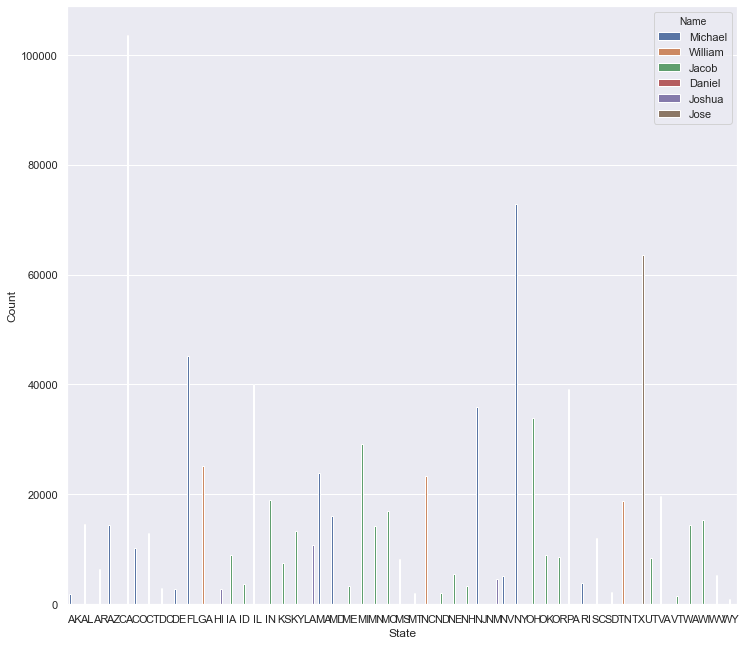

In [7]:
after = sns.barplot(x="State",
                y="Count",
                hue = 'Name',
                data = after_1990)
after

#### 2. Which are top 3 of the most popular names in 1990-2000 years separately among boys and girls in three states selected by you

In [8]:
topn_names_bystate_byyear()

,State,Name,Gender,Count
0,CO,Jessica,F,4359
1,CO,Ashley,F,4059
2,CO,Sarah,F,3585
3,CO,Michael,M,6401
4,CO,Jacob,M,5264
5,CO,Joshua,M,5174
6,CA,Jessica,F,50290
7,CA,Ashley,F,35917
8,CA,Jennifer,F,32046
9,CA,Michael,M,58296


#### 3. Dynamics of three names selected by you in those three states starting from 1990 year

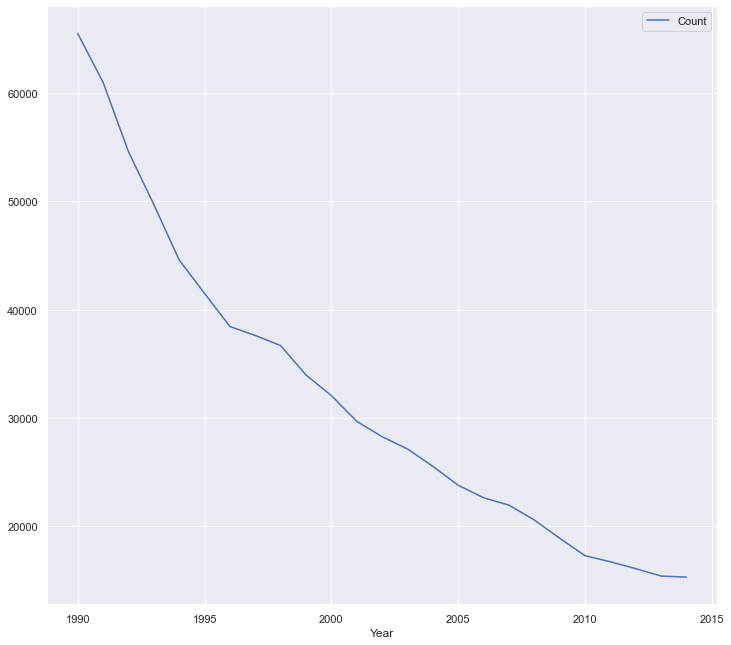

In [9]:
plot_dinamics(name = 'Michael', year = 1990)

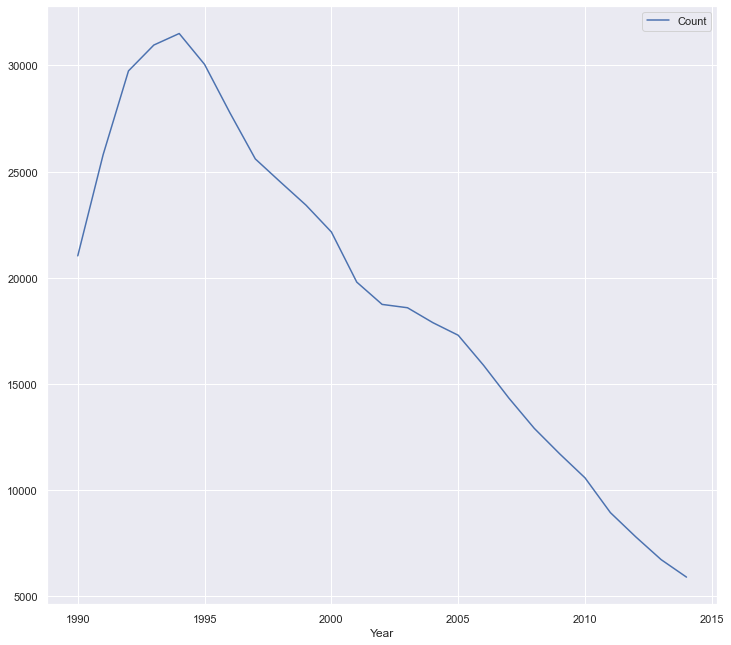

In [10]:
plot_dinamics(name = 'Tyler', year = 1990)

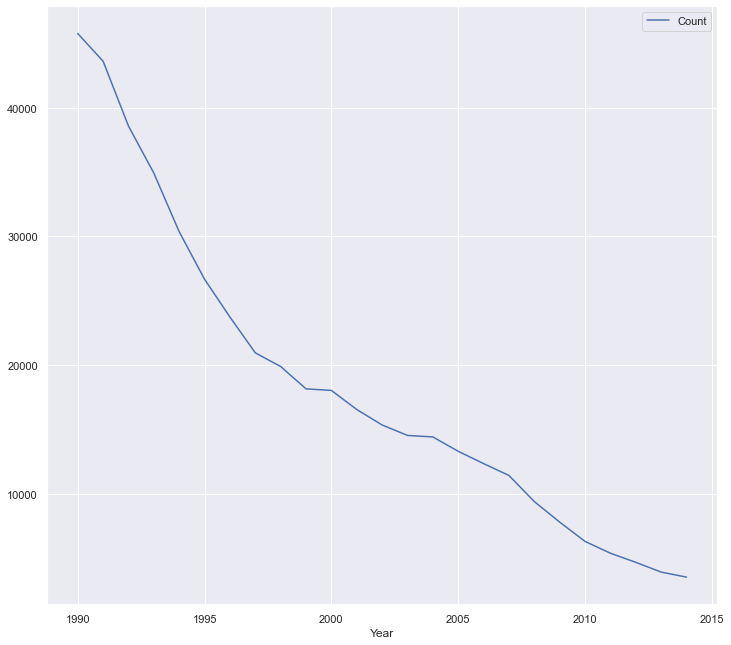

In [11]:
plot_dinamics(name = 'Ashley', year = 1990)